# Set Up

In [1]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/HWK'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from HWK_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

Cloning into 'thesis'...
remote: Enumerating objects: 866, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 866 (delta 79), reused 26 (delta 14), pack-reused 751
Receiving objects: 100% (866/866), 47.03 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (522/522), done.
Updating files: 100% (80/80), done.
Mounted at /content/drive


# Number of comments

## Facebook

In [ ]:
facebook_news=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews.csv')
facebook_vaccines_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored.csv')
facebook_brexit_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored.csv')

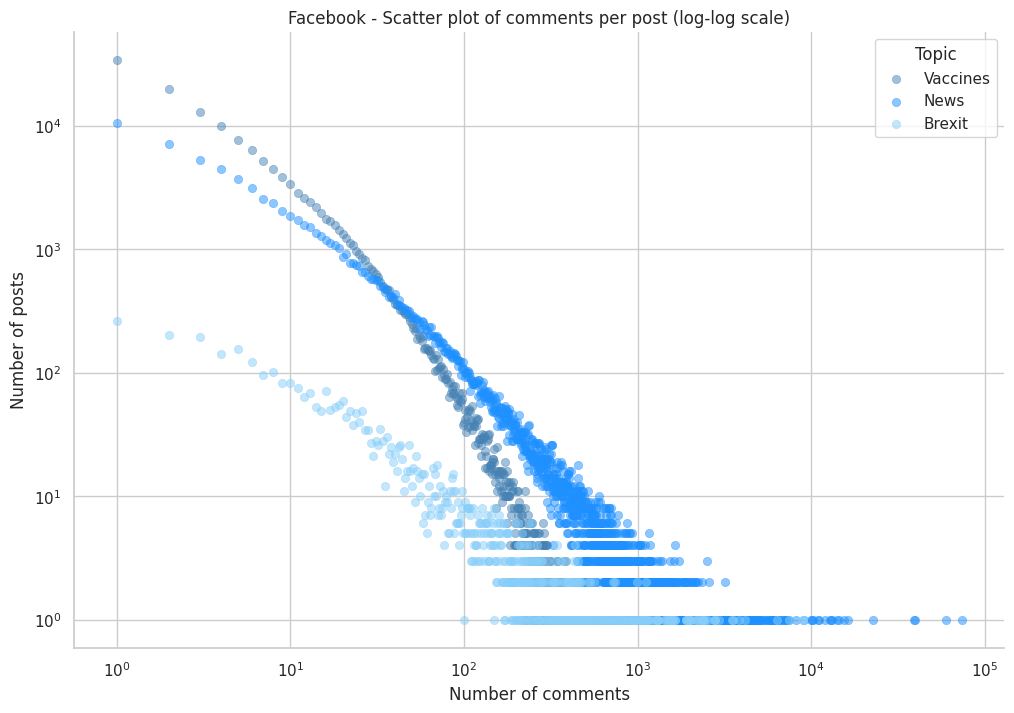

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola il numero di commenti per ogni post per i dati di vaccines
conversation_size_vaccines = facebook_vaccines_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_vaccines.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di news
conversation_size_news = facebook_news.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_news.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di brexit
conversation_size_brexit = facebook_brexit_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_brexit.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti per i dati di vaccines
post_count_vaccines = conversation_size_vaccines.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di news
post_count_news = conversation_size_news.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di brexit
post_count_brexit = conversation_size_brexit.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di vaccines
sns.scatterplot(data=post_count_vaccines, x='comment_count', y='post_count', alpha=0.5, label='Vaccines', color='steelblue', edgecolor=None)

# Scatter plot per i dati di news
sns.scatterplot(data=post_count_news, x='comment_count', y='post_count', alpha=0.5, label='News', color='dodgerblue', edgecolor=None)

# Scatter plot per i dati di brexit
sns.scatterplot(data=post_count_brexit, x='comment_count', y='post_count', alpha=0.5, label='Brexit', color='lightskyblue', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Facebook - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')

# Rimuovi la griglia
plt.grid(False)

plt.legend(title='Topic')
plt.show()


## Gab

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
gab = pd.read_parquet('/content/drive/MyDrive/thesis/data/gab/gab_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = gab.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyboardInterrupt: 

## Reddit

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
reddit = pd.read_parquet('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = reddit.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyError: 'Column not found: comment_id'

## YouTube

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
yt = pd.read_parquet('/content/drive/MyDrive/thesis/data/youtube/youtube_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = yt.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='red', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('YouTube - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


TypeError: read_table() got an unexpected keyword argument 'usecols'

# Model simulation

In [182]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fbb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_processed.csv')
yt=pd.read_csv('/content/drive/MyDrive/thesis/data/youtube/processed_sample.csv')

In [194]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100

fbb= fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_100h'] = fbb['temporal_distance_birth_h'] / 100

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100
vo['post_id'] = vo['root_submission']

yt = yt[yt['temporal_distance_birth_h'] < 100].copy()
yt['temporal_distance_birth_base_100h'] = yt['temporal_distance_birth_h'] / 100


In [187]:

time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

fbb_ECDF = calculate_ECDF(fbb, time_intervals)
fbb_ECDF['Platform']='Facebook - Brexit'
fb_ECDF = calculate_ECDF(fb, time_intervals)
fb_ECDF['Platform']='Facebook - News'
rd_ECDF = calculate_ECDF(rd, time_intervals)
rd_ECDF['Platform']='Reddit'

vo_ECDF = calculate_ECDF(vo, time_intervals)
vo_ECDF['Platform']='Voat'

yt_ECDF = calculate_ECDF(yt, time_intervals)
yt_ECDF['Platform']='yt'

combined_results = pd.concat([fb_ECDF, rd_ECDF,fbb_ECDF,vo_ECDF,yt_ECDF], ignore_index=True)


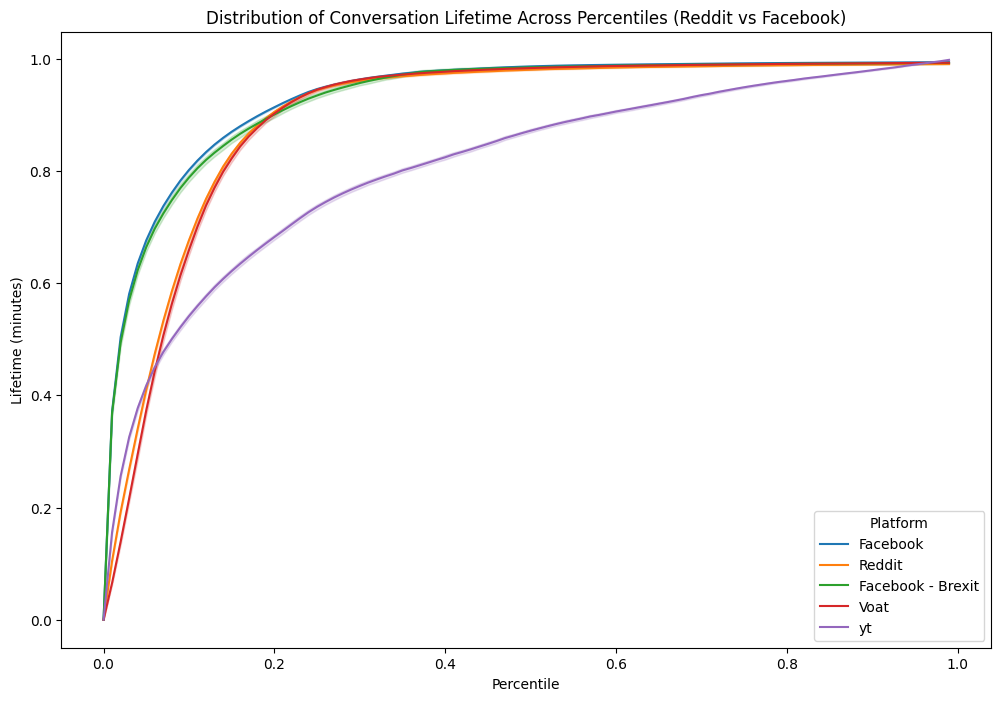

In [188]:
df=combined_results
plot_ECDF(df,level=95)

## Parameter's Choice

### Entrance in theconversation

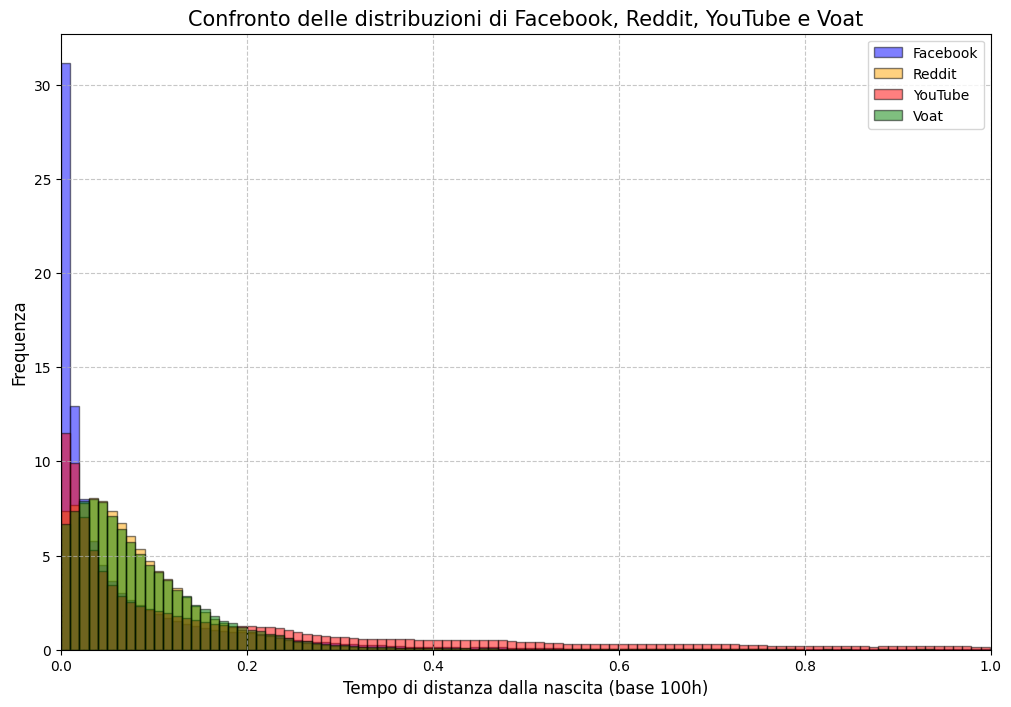

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.hist(fb['temporal_distance_birth_base_100h'], bins=100, alpha=0.5, label='Facebook', color='blue', density=True, edgecolor='black')
plt.hist(rd['temporal_distance_birth_base_100h'], bins=100, alpha=0.5, label='Reddit', color='orange', density=True, edgecolor='black')
plt.hist(yt['temporal_distance_birth_base_100h'], bins=100, alpha=0.5, label='YouTube', color='red', density=True, edgecolor='black')
plt.hist(vo['temporal_distance_birth_base_100h'], bins=100, alpha=0.5, label='Voat', color='green', density=True, edgecolor='black')

plt.title('Confronto delle distribuzioni di Facebook, Reddit, YouTube e Voat', fontsize=15)
plt.xlabel('Tempo di distanza dalla nascita (base 100h)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

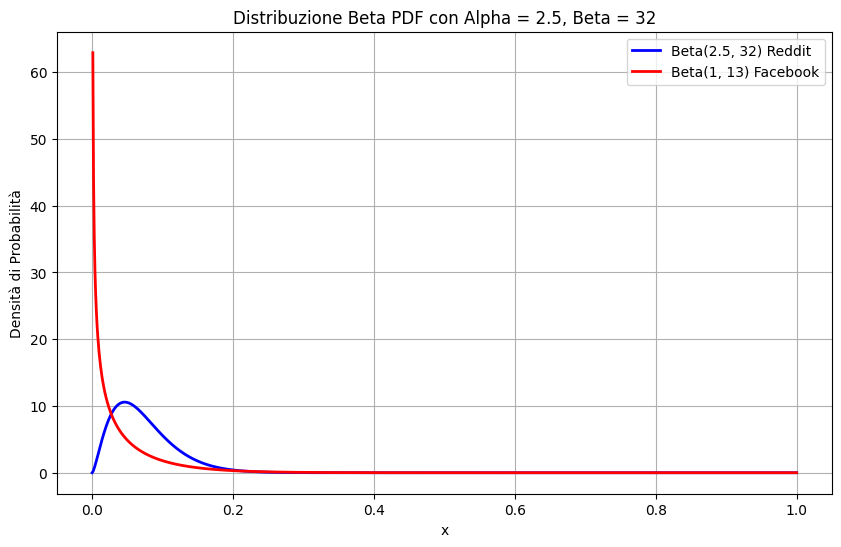

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parametri della distribuzione beta
alpha = 2.5
beta_param = 32

# Generiamo una griglia di valori x per il plot
x = np.linspace(0, 1, 1000)

# Calcoliamo la densità di probabilità (PDF) della distribuzione beta
pdf_beta = beta.pdf(x, alpha, beta_param)
pdf_beta2 = beta.pdf(x, 0.5, 13)

# Plot della distribuzione beta
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_beta, 'b-', lw=2, label=f'Beta({alpha}, {beta_param}) Reddit')
plt.plot(x, pdf_beta2, 'r-', lw=2, label=f'Beta({1}, {13}) Facebook')
plt.title(f'Distribuzione Beta PDF con Alpha = {alpha}, Beta = {beta_param}')
plt.xlabel('x')
plt.ylabel('Densità di Probabilità')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Modellare la size dell'interazione

In [197]:
yt_size_of_interaction=yt.groupby(['user','post_id'])['comment_id'].count()
fb_size_of_interaction=fb.groupby(['user_id','post_id'])['comment_id'].count()
yt_size_of_interaction=rd.groupby(['user','post_id'])['comment_id'].count()


,comment_id,user,post_id,topic,toxicity_score,created_at,social,percentile,sequential_number_of_comment_by_user_in_thread,number_of_comments_by_user_in_thread,...,temporal_distance_birth_h,thread_lifetime_h,number_of_users,number_of_comments,temporal_distance_from_previous_comment_h,IAT_user,IAT_user_thread,IAT_thread,temporal_distance_birth_base_1000h,temporal_distance_birth_base_100h
0,UgwIKs20MkePpOs0hDd4AaABAg,3473,--AMX2o_Icc,News,0.061840,2021-01-20 17:10:06+00:00,YouTube,0.03,1.0,1.0,...,0.0,8690.4,2693.0,3280.0,2.457778,8848.0,NaN,NaN,0.000,0.000
1,UgzSItodK2CvN_-eE3Z4AaABAg,544075,--AMX2o_Icc,News,0.098288,2021-01-20 17:10:29+00:00,YouTube,0.06,1.0,1.0,...,0.0,8690.4,2693.0,3280.0,5.773333,20784.0,NaN,23.0,0.000,0.000
2,UgwuvzOonQWLAC6TgJx4AaABAg,1413628,--AMX2o_Icc,News,0.478864,2021-01-20 17:10:37+00:00,YouTube,0.09,1.0,1.0,...,0.0,8690.4,2693.0,3280.0,NaN,NaN,NaN,8.0,0.000,0.000
3,UgwwZDtc8d5VazHI2mp4AaABAg,691356,--AMX2o_Icc,News,0.038520,2021-01-20 17:10:49+00:00,YouTube,0.12,1.0,7.0,...,0.0,8690.4,2693.0,3280.0,4041.646944,14549929.0,NaN,12.0,0.000,0.000
4,Ugww_mN_JL9UyF7JyYF4AaABAg,581259,--AMX2o_Icc,News,0.471199,2021-01-20 17:11:08+00:00,YouTube,0.15,1.0,1.0,...,0.0,8690.4,2693.0,3280.0,3.249167,11697.0,NaN,19.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965168,UgzErRIlGD54BxBWd_B4AaABAg.8vh4Nu5jxdA8vhE-tFme3b,1253142,zzrrkyByi_U,News,NaN,2019-06-03 01:58:29+00:00,YouTube,69.24,1.0,1.0,...,84.5,22974.5,497.0,751.0,20351.915278,73266895.0,NaN,1087.0,0.845,0.845
9965169,Ugxtb0v9Rk5kCCsBReV4AaABAg,84218,zzrrkyByi_U,News,0.501281,2019-06-03 02:14:59+00:00,YouTube,69.37,1.0,1.0,...,84.8,22974.5,497.0,751.0,NaN,NaN,NaN,990.0,0.848,0.848
9965170,UgxQ8_ofe0leDkq66IF4AaABAg.8vdT-rLSzrH8vhnuruqBXt,973375,zzrrkyByi_U,News,0.444286,2019-06-03 07:20:58+00:00,YouTube,69.51,1.0,1.0,...,89.9,22974.5,497.0,751.0,4699.103889,16916774.0,NaN,18359.0,0.899,0.899
9965171,UgwY3gqS4r3VFWw4L2F4AaABAg.8vZBG4i4H8c8vhx66kq1GC,1058766,zzrrkyByi_U,News,0.087430,2019-06-03 08:41:17+00:00,YouTube,69.64,3.0,4.0,...,91.2,22974.5,497.0,751.0,85.776389,308795.0,308795.0,4819.0,0.912,0.912


In [ ]:
# Calculate the size of interaction for each platform
yt_size_of_interaction = yt.groupby(['user', 'post_id'])['comment_id'].count()
fb_size_of_interaction = fb.groupby(['user_id', 'post_id'])['comment_id'].count()
rd_size_of_interaction = rd.groupby(['user_id', 'post_id'])['comment_code'].count()
vo_size_of_interaction = vo.groupby(['user', 'root_submission'])['comment_id'].count()

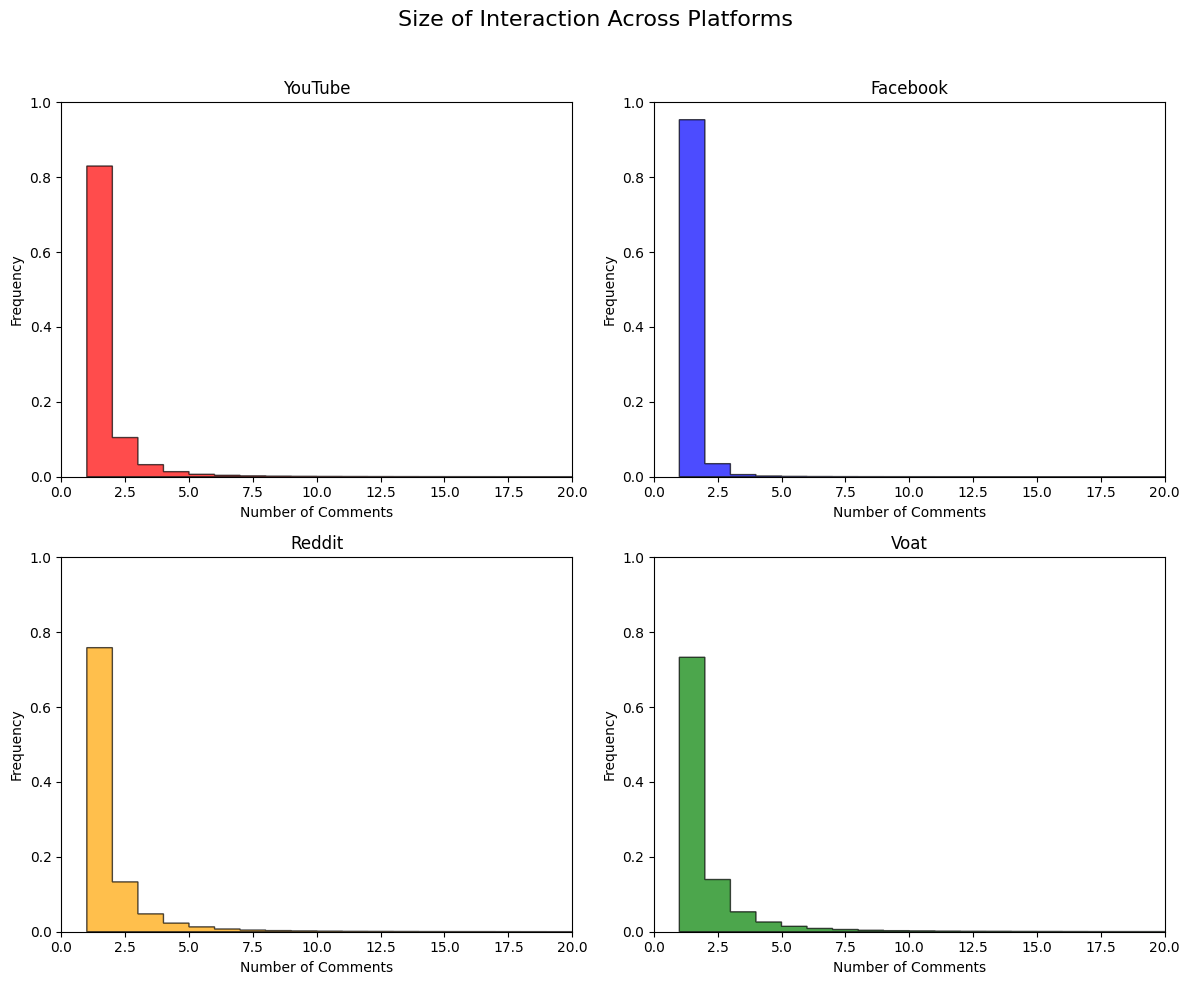

In [225]:
bins = np.arange(1, 1000)

# Creare subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# YouTube
axs[0, 0].hist(yt_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='red', histtype='stepfilled', density=True)
axs[0, 0].set_title('YouTube')
axs[0, 0].set_xlim(0, 20)
axs[0, 0].set_xlabel('Number of Comments')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_ylim(0, 1)

# Facebook
axs[0, 1].hist(fb_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='blue', histtype='stepfilled', density=True)
axs[0, 1].set_title('Facebook')
axs[0, 1].set_xlabel('Number of Comments')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(0, 20)
axs[0, 1].set_ylim(0, 1)

# Reddit
axs[1, 0].hist(rd_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='orange', histtype='stepfilled', density=True)
axs[1, 0].set_title('Reddit')
axs[1, 0].set_xlim(0, 20)
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_xlabel('Number of Comments')
axs[1, 0].set_ylabel('Frequency')

# Voat
axs[1, 1].hist(vo_size_of_interaction, bins=bins, alpha=0.7, edgecolor='black', color='green', histtype='stepfilled', density=True)
axs[1, 1].set_title('Voat')
axs[1, 1].set_xlim(0, 20)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_xlabel('Number of Comments')
axs[1, 1].set_ylabel('Frequency')

# Titolo principale e layout
fig.suptitle('Size of Interaction Across Platforms', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Come possiamo modellare il tempo tra i  commenti

In [245]:
import pandas as pd

# Sample DataFrames for demonstration
# fb = pd.DataFrame([...])
# rd = pd.DataFrame([...])
# yt = pd.DataFrame([...])
# vo = pd.DataFrame([...])

# Function to process each platform
vo['user_id']=vo['user']
yt['user_id']=yt['user']


def process_platform(df, platform_name):
    # Create DataFrames for second and third comments
    df_2 = df[df['sequential_number_of_comment_by_user_in_thread'] == 1][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]
    df_3 = df[df['sequential_number_of_comment_by_user_in_thread'] == 2][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]

    # Rename columns for clarity
    df_2 = df_2.rename(columns={'temporal_distance_birth_base_1000h': 'arrival_time_2'})
    df_3 = df_3.rename(columns={'temporal_distance_birth_base_1000h': 'arrival_time_3'})

    # Merge the DataFrames on user_id and post_id
    merged_df = pd.merge(df_2, df_3, on=['user_id', 'post_id'])

    # Calculate the time difference
    merged_df['time_difference'] = merged_df['arrival_time_3'] - merged_df['arrival_time_2']

    # Display the merged DataFrame
    print(f"Merged DataFrame for {platform_name}:")
    print(merged_df.head(), "\n")

    return merged_df

# Process Facebook
merged_fb = process_platform(fb, 'Facebook')

# Process Reddit
merged_rd = process_platform(rd, 'Reddit')

# Process YouTube
merged_yt = process_platform(yt, 'YouTube')



Merged DataFrame for Facebook:
             user_id                          post_id  arrival_time_2  \
0  10207259087090249  101911273177707_944798945555598           0.006   
1  10201565261650010  101911273177707_944798945555598           0.007   
2   1606482633009855  101911273177707_944798945555598           0.024   
3  10208517029341252  101911273177707_944798945555598           0.131   
4    865911960198782  101911273177707_944798945555598           0.161   

   arrival_time_3  time_difference  
0           0.006            0.000  
1           0.039            0.032  
2           0.024            0.000  
3           0.236            0.105  
4           0.162            0.001   

Merged DataFrame for Reddit:
    user_id post_id  arrival_time_2  arrival_time_3  time_difference
0  t2_9fnae  7nbyx3           0.000           0.066            0.066
1  t2_gfu9w  7nbyx3           0.004           0.014            0.010
2  t2_x8ut7  7nbyx3           0.007           0.108            0.101
3

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded correctly into DataFrames: merged_fb, merged_vo, merged_rd, merged_yt
# Each DataFrame has a column 'time_difference'

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Adjust the positions for each boxplot
positions = [0,1, 2]  # Adjust these positions as needed

# Boxplot for merged_fb
sns.boxplot(x=positions[0], y='time_difference', data=merged_fb, color='blue', width=0.2)

# Boxplot for merged_rd
sns.boxplot(x=positions[1], y='time_difference', data=merged_rd, color='orange', width=0.2)

# Boxplot for merged_yt
sns.boxplot(x=positions[1], y='time_difference', data=merged_yt, color='red', width=0.2)

# Customizing the appearance of the plot
plt.title('Boxplot Comparison of time_difference for Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('time_difference')
plt.xticks(positions, ['merged_fb', 'merged_vo', 'merged_rd', 'merged_yt'])  # Assign labels to positions
plt.grid(True)

# Show the plot
plt.show()

merged_fb['time_difference'].mean()

merged_rd['time_difference'].mean()

merged_yt['time_difference'].mean()

0.027696429783302095

## Manual simulation

### Parameters FB

In [160]:
a=0.5# 2
b=11
alpha=0.98# 0.8
lambda_=4
mu=0.001 #0.002
sd=0.005
k=1.01
simulated, observed=simulate_data(fb, alpha, lambda_, mu, sd, a, b, k, num_threads=100)

100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


In [167]:
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Observed'

reddit_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:100])], time_intervals)
reddit_ECDF['Platform']='Reddit'



Processing DataFrame: 100%|██████████| 100/100 [00:03<00:00, 26.15it/s]


In [168]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))

The error is equal to: 204.28


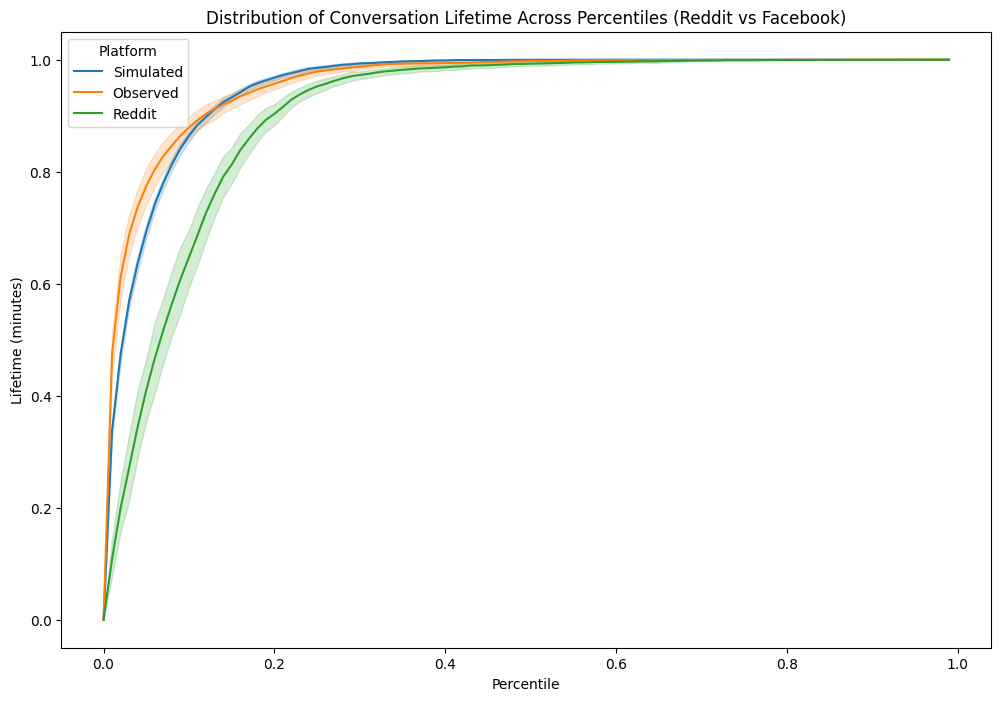

In [169]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF,reddit_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 0.8,20

### Parameters YT

In [286]:
a=1# 2
b=11
alpha=0.2# 0.8
lambda_=5
mu=0.05 #0.002
sd=0.01
k=1.01
simulated, observed=simulate_data(yt, alpha, lambda_, mu, sd, a, b, k, num_threads=10)

100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


In [287]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='YouTube'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:10])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:10])], time_intervals)
youtube_ECDF['Platform']='Reddit'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 10/10 [00:00<00:00, 36.95it/s]


In [288]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))

The error is equal to: 107.52


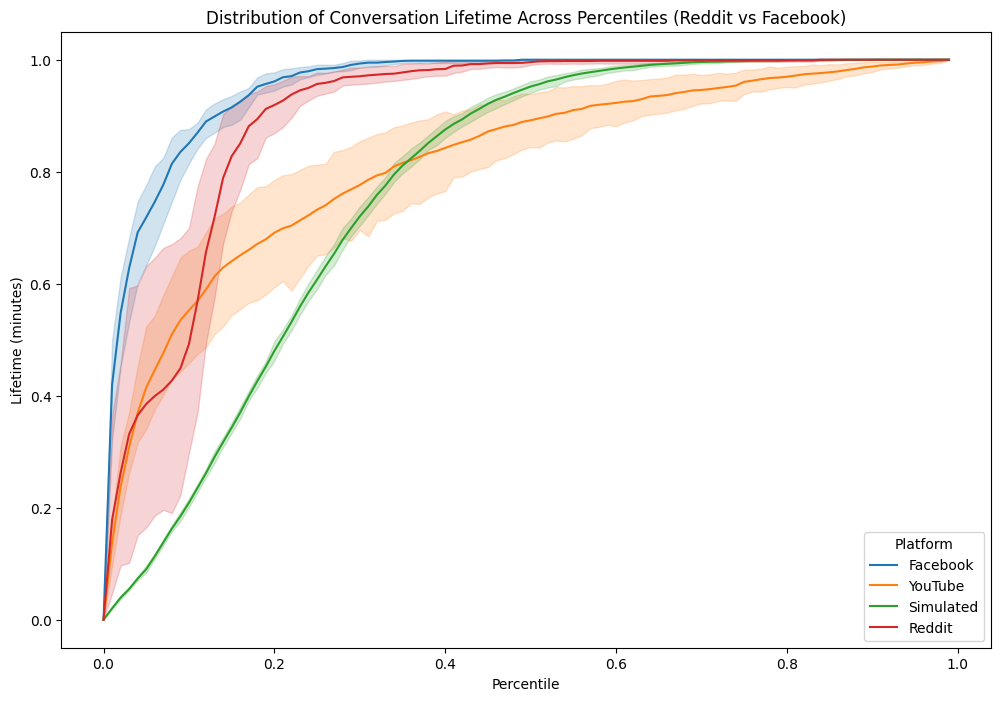

In [289]:
combined_results = pd.concat([reddit_ECDF, observed_ECDF,simulated_ECDF,youtube_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 2,20

### Parameters RD

In [263]:
a=0.9# 2
b=13
alpha=0.8# 0.8
lambda_=7
mu=0.0018 #0.002
sd=0.01
k=1.01
simulated, observed=simulate_data(rd, alpha, lambda_, mu, sd, a, b, k, num_threads=100)

100%|██████████| 100/100 [00:13<00:00,  7.60it/s]


In [265]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Reddit'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:100])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(yt[yt['post_id'].isin(yt['post_id'].unique()[0:100])], time_intervals)
youtube_ECDF['Platform']='YouTube'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 100/100 [00:03<00:00, 25.11it/s]


In [266]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))

The error is equal to: 362.24


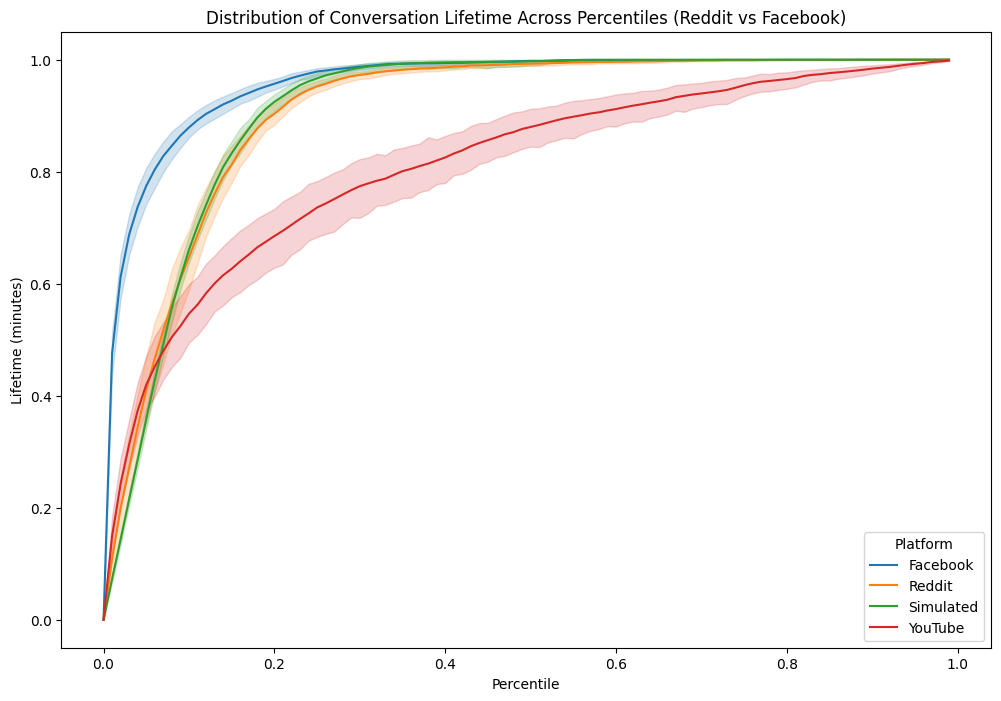

In [267]:
combined_results = pd.concat([reddit_ECDF, observed_ECDF,simulated_ECDF,youtube_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 2,20

## Grid Search

In [126]:
import itertools

# Define social
social=fb

# Define the grid of parameters
parameters = {
    'a': [ 0.1,0.3,0.5,1,2,3],
    'b': [5,10,15, 20, 25,30,35],
    'alpha': [0.95],
    'lambda_': [4],
    'mu': [0.002],
    'sd': [0.001],
    'k': [1.0]
}

# Initialize an empty list to store results
results = []

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Loop over each parameter combination
for params in (param_combinations):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(social, alpha, lambda_, mu, sd, a, b, k, num_threads=20)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))


# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])




,a,b,alpha,lambda_,mu,sd,k,Error
0,0.1,5,0.95,4,0.002,0.001,1.0,27.972844
1,0.1,10,0.95,4,0.002,0.001,1.0,34.504680
2,0.1,15,0.95,4,0.002,0.001,1.0,37.241772
3,0.1,20,0.95,4,0.002,0.001,1.0,38.631210
4,0.1,25,0.95,4,0.002,0.001,1.0,39.100527
5,0.1,30,0.95,4,0.002,0.001,1.0,39.729797
6,0.1,35,0.95,4,0.002,0.001,1.0,40.126919
7,0.3,5,0.95,4,0.002,0.001,1.0,22.491169
8,0.3,10,0.95,4,0.002,0.001,1.0,20.771389
9,0.3,15,0.95,4,0.002,0.001,1.0,26.385883


In [ ]:
import itertools

# Define social
social=rd

# Define the grid of parameters
parameters = {
    'a': [ 0.1,0.3,0.5,1,2,3],
    'b': [5,10,15, 20, 25,30,35],
    'alpha': [1,0.95,0.9,0.8,0.75],
    'lambda_': [1,4,8,13],
    'mu': [0.002],
    'sd': [0.001],
    'k': [1.0]
}

# Initialize an empty list to store results
results = []

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Loop over each parameter combination
for params in (param_combinations):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(social, alpha, lambda_, mu, sd, a, b, k, num_threads=1)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))


# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])


